#### Working with Data set

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("C:\\Users\\SHAARIF ANAS\\Desktop\\MAT 491\\final Project\\CHDdata.csv")

In [4]:
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80.0,77,0
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95.0,76,0
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75.0,70,0
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65.0,103,1
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85.0,85,0
5,0,43,2,0,0,0,0,1,0,228,180.0,110.0,30.30,77.0,99,0
6,0,63,1,0,0,0,0,0,0,205,138.0,71.0,33.11,60.0,85,1
7,0,45,2,1,20,0,0,0,0,313,100.0,71.0,21.68,79.0,78,0
8,1,52,1,0,0,0,0,1,0,260,141.5,89.0,26.36,76.0,79,0
9,1,43,1,1,30,0,0,1,0,225,162.0,107.0,23.61,93.0,88,0


In [5]:
missing_values = df.isnull().sum()
missing_values

male                0
age                 0
education           0
currentSmoker       0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                19
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
missing_values = df.isnull().sum()
missing_values

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [8]:
## Testing and Trainig Split (70% - 30%)
from sklearn.model_selection import train_test_split

feature_cols = df.columns.drop('TenYearCHD')
x = df.drop('TenYearCHD', axis = 1)
y = df[['TenYearCHD']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

#### LDA and QDA 

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_auc_score
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

lda = LinearDiscriminantAnalysis()
model_1 = lda.fit(X_train, y_train.values.ravel())

y_pred_train = model_1.predict(X_train)
y_pred_test = model_1.predict(X_test)
print("Training Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred_test))

lda_probabilities = model_1.predict_proba(X_test)[:,1]
print("Area Under ROC curve:",roc_auc_score(y_test, lda_probabilities))

Training Accuracy: 0.8543360433604336
Testing Accuracy: 0.8562401263823065
Area Under ROC curve: 0.7321903737037763


In [43]:
qda = QuadraticDiscriminantAnalysis()
model_2 = qda.fit(X_train, y_train.values.ravel())

y_pred_train = model_2.predict(X_train)
y_pred_test = model_2.predict(X_test)
print("Training Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred_test))

qda_probabilities = model_2.predict_proba(X_test)[:,1]
print("Area Under ROC curve:",roc_auc_score(y_test, qda_probabilities))

Training Accuracy: 0.8221544715447154
Testing Accuracy: 0.8278041074249605
Area Under ROC curve: 0.704659068675406


#### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression


model_3 = LogisticRegression()
model_3.fit(X_train, y_train.values.ravel())

y_pred_train = model_3.predict(X_train)
y_pred_test = model_3.predict(X_test)
print("Training Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred_test))

logistic_probabilities = model_3.predict_proba(X_test)[:,1]
print("Area Under ROC curve:",roc_auc_score(y_test, logistic_probabilities))

Training Accuracy: 0.8519647696476965
Testing Accuracy: 0.8515007898894155
Area Under ROC curve: 0.6503423987477989


C:\Users\SHAARIF ANAS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Decision Tree Classifier

In [45]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import GridSearchCV

# Create Decision Tree classifer object
clf_1 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_1 = clf_1.fit(X_train,y_train)

#Predict the response for test and training dataset
y_pred_train = clf_1.predict(X_train)
y_pred_test = clf_1.predict(X_test)
print("Training Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred_test))

Decision_tree_probabilities = clf_1.predict_proba(X_test)[:,1]
print("Area Under ROC curve:",roc_auc_score(y_test, Decision_tree_probabilities))

Training Accuracy: 1.0
Testing Accuracy: 0.7630331753554502
Area Under ROC curve: 0.5507288201917433


##### Use Cross Validation for best parameters

In [46]:
params = {'max_depth': [2,4,6,8,10,12, 14, 16],
         'min_samples_split': [2,3,4,5,6],
         'min_samples_leaf': [1,2,3]}

clf_1 = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf_1,param_grid=params)
gcv.fit(X_train,y_train)
gcv.best_estimator_

model_4 = gcv.best_estimator_
model_4.fit(X_train,y_train)

y_pred_train = model_4.predict(X_train)
y_pred_test = model_4.predict(X_test)
print("Training Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred_test))

decision_tree_probabilities = model_4.predict_proba(X_test)[:,1]
print("Area Under ROC curve:",roc_auc_score(y_test, decision_tree_probabilities))

Training Accuracy: 0.850609756097561
Testing Accuracy: 0.8507109004739336
Area Under ROC curve: 0.6616268831931129


#### Bagging

In [47]:
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier

model_5 = BaggingClassifier()
model_5.fit(X_train, y_train.values.ravel())
y_pred_train = model_5.predict(X_train)
y_pred_test = model_5.predict(X_test)
print("Training Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred_test))

bagging_probabilities = model_5.predict_proba(X_test)[:,1]
print("Area Under ROC curve:",roc_auc_score(y_test, bagging_probabilities))

Training Accuracy: 0.9718834688346883
Testing Accuracy: 0.8459715639810427
Area Under ROC curve: 0.6778541381334378


#### Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

model_6 = RandomForestClassifier()
model_6.fit(X_train, y_train.values.ravel())

y_pred_train = model_6.predict(X_train)
y_pred_test = model_6.predict(X_test)
print("Training Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred_test))

Rand_for_probabilities = model_6.predict_proba(X_test)[:,1]
print("Area Under ROC curve:",roc_auc_score(y_test, Rand_for_probabilities))

Training Accuracy: 0.9996612466124661
Testing Accuracy: 0.8475513428120063
Area Under ROC curve: 0.6942990608491488


#### Boosting

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

model_7 = GradientBoostingClassifier()
model_7.fit(X_train, y_train.values.ravel())

y_pred_train = model_7.predict(X_train)
y_pred_test = model_7.predict(X_test)
print("Training Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred_test))

boosting_probabilities = model_7.predict_proba(X_test)[:,1]
print("Area Under ROC curve:",roc_auc_score(y_test, boosting_probabilities))

model_7.feature_importances_

Training Accuracy: 0.8794037940379403
Testing Accuracy: 0.8507109004739336
Area Under ROC curve: 0.7049745646644492


array([0.05301046, 0.22438117, 0.01190795, 0.00166905, 0.0547807 ,
       0.00427021, 0.00911903, 0.03676641, 0.00081787, 0.09549351,
       0.14949764, 0.09283915, 0.11447481, 0.04890614, 0.1020659 ])

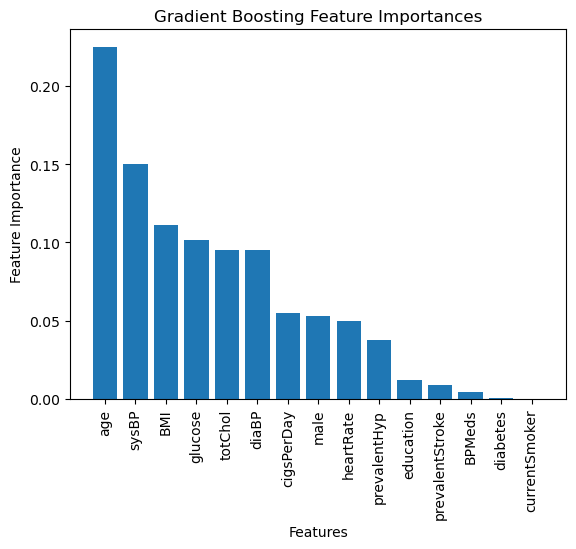

In [20]:
import matplotlib.pyplot as plt

feature_importances = model_7.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices])
plt.xticks(range(X_train.shape[1]), df.columns[sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Gradient Boosting Feature Importances')
plt.savefig("Feature imporatnces.png")

##### Use Cross Validation for best parameters

In [51]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

model_8 = GradientBoostingClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 500]
grid['learning_rate'] = [0.01, 0.1, 1.0]
grid['subsample'] = [0.3, 0.7]
grid['max_depth'] = [3, 7]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model_8, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X_train, y_train.values.ravel())

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

model_8 = GradientBoostingClassifier(learning_rate=0.1, max_depth=7, n_estimators=50,subsample=0.7)
model_8.fit(X_train, y_train.values.ravel())

y_pred_train = model_8.predict(X_train)
y_pred_test = model_8.predict(X_test)
print("Training Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred_test))

boosting_probabilities = model_8.predict_proba(X_test)[:,1]
print("Area Under ROC curve:",roc_auc_score(y_test, boosting_probabilities))

Best: 0.851740 using {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.3}
Training Accuracy: 0.9468157181571816
Testing Accuracy: 0.8420221169036335
Area Under ROC curve: 0.6879964781843083


#### Support Vector Machine

In [58]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV, KFold 

#Create a svm Classifier
clf_2 = svm.SVC(kernel='linear', probability = True) # Linear Kernel
#Train the model using the training sets
clf_2.fit(X_train, y_train)

y_pred_train = clf_2.predict(X_train)
y_pred_test = clf_2.predict(X_test)
print("Training Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred_test))

svm_probabilities = clf_2.predict_proba(X_test)[:,1]
print("Area Under ROC curve:",roc_auc_score(y_test, svm_probabilities))

C:\Users\SHAARIF ANAS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy: 0.8499322493224932
Testing Accuracy: 0.8499210110584519
Area Under ROC curve: 0.7174525533163765


In [57]:
#Create a svm with radial kernel
clf_3 = svm.SVC(kernel='rbf',probability = True) # rbf kernel
#Train the model using the training sets
clf_3.fit(X_train, y_train)

y_pred_train = clf_3.predict(X_train)
y_pred_test = clf_3.predict(X_test)
print("Training Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred_test))

svm_probabilities = clf_3.predict_proba(X_test)[:,1]
print("Area Under ROC curve:",roc_auc_score(y_test, svm_probabilities))

C:\Users\SHAARIF ANAS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy: 0.8509485094850948
Testing Accuracy: 0.8499210110584519
Area Under ROC curve: 0.620759146937977


##### Use Cross Validation for best 'C'

In [24]:
grid = dict()
C = np.linspace(0.01,10, 100)
cv = KFold(n_splits=5, shuffle=True, random_state=1)
grid['C'] = C 
# define search
search = GridSearchCV(clf_3, grid, scoring='accuracy', cv=cv, n_jobs=-1)
result = search.fit(X_train,y_train)
print('accuracy: %.3f' % result.best_score_)
print('Config: %s' % result.best_params_)

C:\Users\SHAARIF ANAS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy: 0.850
Config: {'C': 5.3581818181818175}


In [25]:
# SUPPORT VECTOR MACHINE WITH RADIAL KERNEL AND BEST 'C'

#Create a svm with radial kernel with C = 5.358
clf_best = svm.SVC(C = result.best_params_['C'], probability = True) # radial Kernel
#Train the model using the training sets
clf_best.fit(X_train, y_train)

y_pred_test = clf_best.predict(X_test)
y_pred_train = clf_best.predict(X_train)

y_pred_train = clf_best.predict(X_train)
y_pred_test = clf_best.predict(X_test)
print("Training Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred_test))

svm_probabilities = clf_best.predict_proba(X_test)[:,1]
print("Area Under ROC curve:",roc_auc_score(y_test, svm_probabilities))

C:\Users\SHAARIF ANAS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy: 0.8512872628726287
Testing Accuracy: 0.8499210110584519
Area Under ROC curve: 0.6060213265505772
